In [3]:
import pandas as pd
import numpy as np


In [4]:
diabetic_df= pd.read_csv(r"C:\Users\adars\Downloads\Hero Vired\Capstone Project Hospital Readmission\Pharma Project-20250804T170634Z-1-001\Pharma Project\Dataset_Predicting Hospital (1)\diabetic_data.csv")

In [5]:
diabetic_df.tail()

encounter_id  patient_nbr             race  gender      age weight  \
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
101761                       No                      No      Ch         Yes   
101762                       No                      No      No         Yes   
101763                       No                      No      Ch         Yes   
101764                       No                      No      Ch         Yes   
101765                       No                      No      No          No   

       readmitted  
101761        >30  
101762         NO  
101763         NO  
101764         NO  
101765         NO  

[5 rows x 50 columns]

In [6]:
diabetic_df.shape

(101766, 50)

In [7]:
diabetic_df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [8]:
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
#checking duplicate
diabetic_df.duplicated().sum()

0

In [10]:
#checking if dubplicate patient_nbr
diabetic_df['patient_nbr'].duplicated().sum()

30248

In [11]:
#replace ? with NaN
diabetic_df.replace("?", np.nan, inplace=True)
diabetic_df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [12]:
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [13]:
diabetic_df.replace(['?', 'NA', 'N/A', '', 'unknown', 'Unknown'], np.nan, inplace=True)


In [14]:
#checking percentage of missing value
round(diabetic_df.isnull().sum()*100/len(diabetic_df),2)


encounter_id                 0.00
patient_nbr                  0.00
race                         2.23
gender                       0.00
age                          0.00
weight                      96.86
admission_type_id            0.00
discharge_disposition_id     0.00
admission_source_id          0.00
time_in_hospital             0.00
payer_code                  39.56
medical_specialty           49.08
num_lab_procedures           0.00
num_procedures               0.00
num_medications              0.00
number_outpatient            0.00
number_emergency             0.00
number_inpatient             0.00
diag_1                       0.02
diag_2                       0.35
diag_3                       1.40
number_diagnoses             0.00
max_glu_serum               94.75
A1Cresult                   83.28
metformin                    0.00
repaglinide                  0.00
nateglinide                  0.00
chlorpropamide               0.00
glimepiride                  0.00
acetohexamide 

In [15]:
#dropping the column which has missing value more than 90%
diabetic_df.drop(columns=["weight", "max_glu_serum"], inplace=True, errors="ignore")

# fill missing values -- > 'Missing"
diabetic_df["A1Cresult"] = diabetic_df["A1Cresult"].fillna("Missing")

In [16]:
diabetic_df.fillna({
    "payer_code": "Unknown",
    "medical_specialty": "Unknown",
    "diag_1": "Unknown",
    "diag_2": "Unknown",
    "diag_3": "Unknown",
    "race": "Unknown"}, inplace=True)

In [17]:
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                101766 non-null  object
 10  medical_specialty         101766 non-null  object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

In [18]:
num_cols = [
    "time_in_hospital", "num_lab_procedures", "num_procedures",
    "num_medications", "number_outpatient", "number_emergency",
    "number_inpatient", "number_diagnoses"
]

# Summary stats
print(diabetic_df[num_cols].describe())

# Quick IQR method to flag outliers
for col in num_cols:
    q1 = diabetic_df[col].quantile(0.25)
    q3 = diabetic_df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = diabetic_df[(diabetic_df[col] < lower) | (diabetic_df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers (lower={lower}, upper={upper})")


       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count     101766.000000       101766.000000   101766.000000    101766.000000   
mean           4.395987           43.095641        1.339730        16.021844   
std            2.985108           19.674362        1.705807         8.127566   
min            1.000000            1.000000        0.000000         1.000000   
25%            2.000000           31.000000        0.000000        10.000000   
50%            4.000000           44.000000        1.000000        15.000000   
75%            6.000000           57.000000        2.000000        20.000000   
max           14.000000          132.000000        6.000000        81.000000   

       number_outpatient  number_emergency  number_inpatient  number_diagnoses  
count      101766.000000     101766.000000     101766.000000     101766.000000  
mean            0.369357          0.197836          0.635566          7.422607  
std             1.267265          0.

In [19]:
mimic_df = pd.read_csv(r"C:\Users\adars\Downloads\Hero Vired\Capstone Project Hospital Readmission\Pharma Project-20250804T170634Z-1-001\Pharma Project\Dataset_Predicting Hospital (1)\mimic_iii_data.csv")

C:\Users\adars\AppData\Local\Temp\ipykernel_5728\2137057703.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  mimic_df = pd.read_csv(r"C:\Users\adars\Downloads\Hero Vired\Capstone Project Hospital Readmission\Pharma Project-20250804T170634Z-1-001\Pharma Project\Dataset_Predicting Hospital (1)\mimic_iii_data.csv")


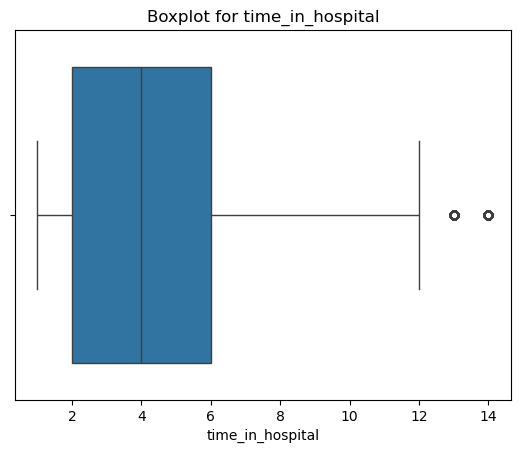

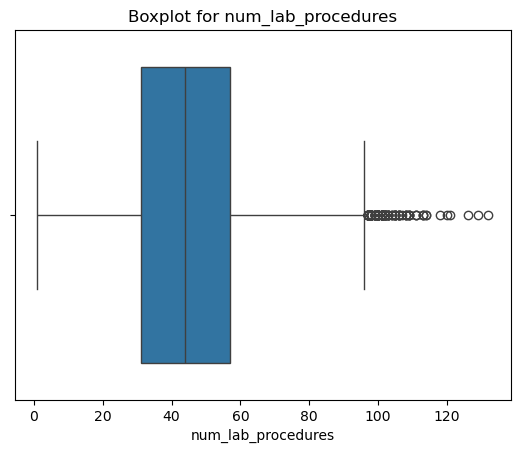

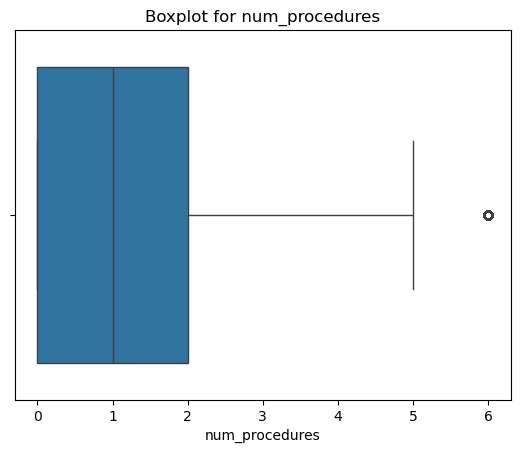

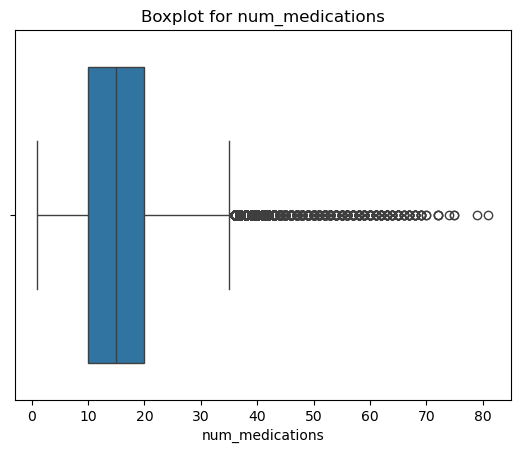

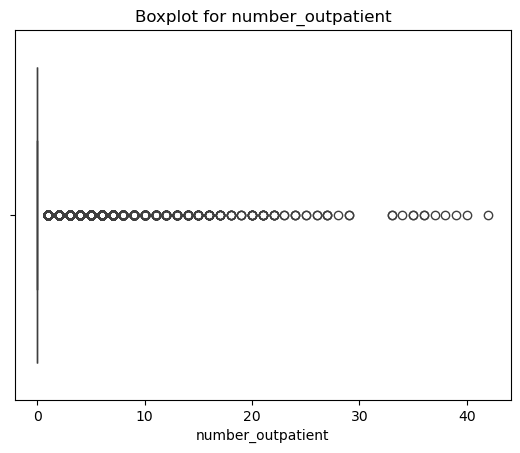

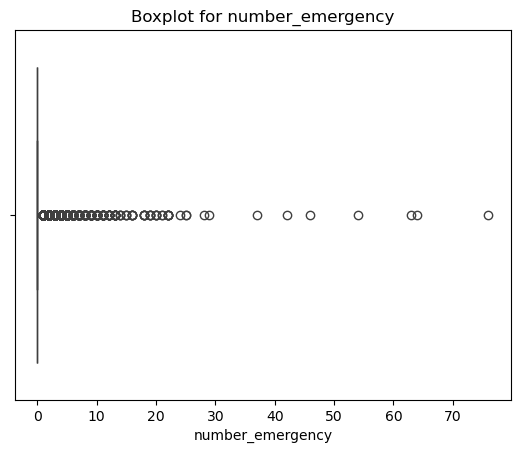

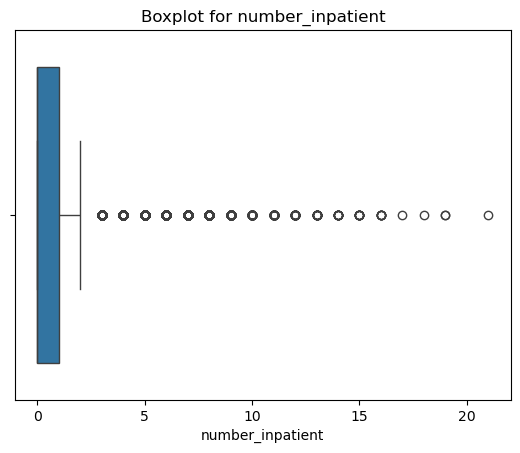

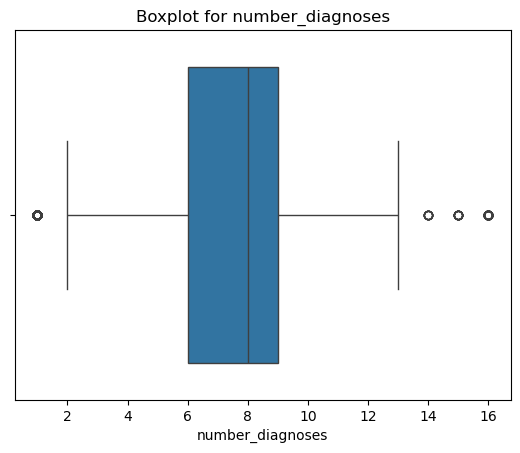

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    sns.boxplot(x=diabetic_df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [ ]:
#for col in num_cols:
   # plt.figure()  # Start a new figure for each plot
    #sns.boxplot(x=diabetic_df[col])
    #plt.title(f"Boxplot for {col}")
    #plt.savefig(f"boxplot_{col}.png", bbox_inches='tight')  # Save the figure
    #plt.close()

In [21]:
mimic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient_ID                100000 non-null  int64  
 1   ICU_Admission_ID          100000 non-null  int64  
 2   ICU_Length_of_Stay        100000 non-null  int64  
 3   Diagnoses                 100000 non-null  object 
 4   Blood_Glucose             100000 non-null  int64  
 5   Creatinine                100000 non-null  float64
 6   Hemoglobin                100000 non-null  float64
 7   WBC                       100000 non-null  float64
 8   Heart_Rate                100000 non-null  int64  
 9   Blood_Pressure_Systolic   100000 non-null  int64  
 10  Blood_Pressure_Diastolic  100000 non-null  int64  
 11  SpO2                      100000 non-null  int64  
 12  Respiratory_Rate          100000 non-null  int64  
 13  Temperature               100000 non-null  fl

In [22]:
mimic_df['Medications']= mimic_df["Medications"].fillna("Unknown")

In [23]:
mimic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient_ID                100000 non-null  int64  
 1   ICU_Admission_ID          100000 non-null  int64  
 2   ICU_Length_of_Stay        100000 non-null  int64  
 3   Diagnoses                 100000 non-null  object 
 4   Blood_Glucose             100000 non-null  int64  
 5   Creatinine                100000 non-null  float64
 6   Hemoglobin                100000 non-null  float64
 7   WBC                       100000 non-null  float64
 8   Heart_Rate                100000 non-null  int64  
 9   Blood_Pressure_Systolic   100000 non-null  int64  
 10  Blood_Pressure_Diastolic  100000 non-null  int64  
 11  SpO2                      100000 non-null  int64  
 12  Respiratory_Rate          100000 non-null  int64  
 13  Temperature               100000 non-null  fl

In [24]:
import pandas as pd

merged_df = pd.merge(diabetic_df, mimic_df,
                     left_on='patient_nbr', right_on='Patient_ID',
                     how='inner')



In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141325 entries, 0 to 141324
Data columns (total 70 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              141325 non-null  int64  
 1   patient_nbr               141325 non-null  int64  
 2   race                      141325 non-null  object 
 3   gender                    141325 non-null  object 
 4   age                       141325 non-null  object 
 5   admission_type_id         141325 non-null  int64  
 6   discharge_disposition_id  141325 non-null  int64  
 7   admission_source_id       141325 non-null  int64  
 8   time_in_hospital          141325 non-null  int64  
 9   payer_code                141325 non-null  object 
 10  medical_specialty         141325 non-null  object 
 11  num_lab_procedures        141325 non-null  int64  
 12  num_procedures            141325 non-null  int64  
 13  num_medications           141325 non-null  i

In [26]:
merged_df.head(20)

encounter_id  patient_nbr             race  gender       age  \
0        2278392      8222157        Caucasian  Female    [0-10)   
1        2278392      8222157        Caucasian  Female    [0-10)   
2         149190     55629189        Caucasian  Female   [10-20)   
3         149190     55629189        Caucasian  Female   [10-20)   
4          64410     86047875  AfricanAmerican  Female   [20-30)   
5          64410     86047875  AfricanAmerican  Female   [20-30)   
6         500364     82442376        Caucasian    Male   [30-40)   
7         500364     82442376        Caucasian    Male   [30-40)   
8          16680     42519267        Caucasian    Male   [40-50)   
9          16680     42519267        Caucasian    Male   [40-50)   
10         35754     82637451        Caucasian    Male   [50-60)   
11         35754     82637451        Caucasian    Male   [50-60)   
12         55842     84259809        Caucasian    Male   [60-70)   
13         55842     84259809        Caucasian    Male   [60-70)   
14         63768    114882984        Caucasian    Male   [70-80)   
15         63768    114882984        Caucasian    Male   [70-80)   
16         12522     48330783        Caucasian  Female   [80-90)   
17         12522     48330783        Caucasian  Female   [80-90)   
18         15738     63555939        Caucasian  Female  [90-100)   
19         15738     63555939        Caucasian  Female  [90-100)   

    admission_type_id  discharge_disposition_id  admission_source_id  \
0                   6                        25                    1   
1                   6                        25                    1   
2                   1                         1                    7   
3                   1                         1                    7   
4                   1                         1                    7   
5                   1                         1                    7   
6                   1                         1                    7   
7                   1                         1                    7   
8                   1                         1                    7   
9                   1                         1                    7   
10                  2                         1                    2   
11                  2                         1                    2   
12                  3                         1                    2   
13                  3                         1                    2   
14                  1                         1                    7   
15                  1                         1                    7   
16                  2                         1                    4   
17                  2                         1                    4   
18                  3                         3                    4   
19                  3                         3                    4   

    time_in_hospital payer_code  ... Respiratory_Rate  Temperature  \
0                  1    Unknown  ...               16    36.509798   
1                  1    Unknown  ...               15    39.599822   
2                  3    Unknown  ...               16    37.639906   
3                  3    Unknown  ...               21    39.013647   
4                  2    Unknown  ...               17    37.377471   
5                  2    Unknown  ...               15    36.481714   
6                  2    Unknown  ...               12    39.114581   
7                  2    Unknown  ...               21    39.634702   
8                  1    Unknown  ...               19    38.287349   
9                  1    Unknown  ...               23    39.411862   
10                 3    Unknown  ...               13    36.522812   
11                 3    Unknown  ...               16    37.151761   
12                 4    Unknown  ...               13    38.490457   
13                 4    Unknown  ...               22    37.498571   
14          

In [27]:
merged_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Patient_ID', 'ICU_Admission_ID', 'ICU_Length_of_Stay', 'Diagnoses',
       'Blood_Glucose', 'Creatinine', 'Hemo

In [28]:
# Standardize MIMIC-III DataFrame column names
merged_df.columns = (
    merged_df.columns
    .str.strip()                     # Remove extra spaces
    .str.lower()                     # Convert to lowercase
    .str.replace(' ', '_')           # Replace spaces with underscores
    .str.replace('-', '_')           # Replace hyphens with underscores
    .str.replace('__', '_')          # Handle double underscores
)


In [29]:
# Verify after cleaning
print("✅ Cleaned Column Names:")
print(merged_df.columns.tolist())


✅ Cleaned Column Names:
['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'a1cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide_metformin', 'glipizide_metformin', 'glimepiride_pioglitazone', 'metformin_rosiglitazone', 'metformin_pioglitazone', 'change', 'diabetesmed', 'readmitted', 'patient_id', 'icu_admission_id', 'icu_length_of_stay', 'diagnoses', 'blood_glucose', 'creatinine', 'hemoglobin', 'wbc', 'heart_rate', 'blood_pressure_systolic', 'blood_pressure_diastol

In [30]:
#merged_df.to_csv("final_merged_data.csv", index=False)



In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141325 entries, 0 to 141324
Data columns (total 70 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              141325 non-null  int64  
 1   patient_nbr               141325 non-null  int64  
 2   race                      141325 non-null  object 
 3   gender                    141325 non-null  object 
 4   age                       141325 non-null  object 
 5   admission_type_id         141325 non-null  int64  
 6   discharge_disposition_id  141325 non-null  int64  
 7   admission_source_id       141325 non-null  int64  
 8   time_in_hospital          141325 non-null  int64  
 9   payer_code                141325 non-null  object 
 10  medical_specialty         141325 non-null  object 
 11  num_lab_procedures        141325 non-null  int64  
 12  num_procedures            141325 non-null  int64  
 13  num_medications           141325 non-null  i

In [32]:
merged_df.head()

encounter_id  patient_nbr             race  gender      age  \
0       2278392      8222157        Caucasian  Female   [0-10)   
1       2278392      8222157        Caucasian  Female   [0-10)   
2        149190     55629189        Caucasian  Female  [10-20)   
3        149190     55629189        Caucasian  Female  [10-20)   
4         64410     86047875  AfricanAmerican  Female  [20-30)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  6                        25                    1   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code  ... respiratory_rate  temperature  \
0                 1    Unknown  ...               16    36.509798   
1                 1    Unknown  ...               15    39.599822   
2                 3    Unknown  ...               16    37.639906   
3                 3    Unknown  ...               21    39.013647   
4                 2    Unknown  ...               17    37.377471   

   medications  number_of_lab_tests  number_of_medications  readmission_flag  \
0      Unknown                    9                      1                 0   
1      Unknown                   17                      3                 1   
2     Steroids                    6                      2                 0   
3      Insulin                   19                      3                 0   
4      Insulin                    7                      4                 0   

   unnamed:_18 unnamed:_19 unnamed:_20               unnamed:_21  
0          NaN         NaN         NaN                       NaN  
1          NaN         NaN         NaN                       NaN  
2          NaN         NaN     71520.0            Unique Patient  
3          NaN         NaN         NaN                       NaN  
4          NaN         NaN    100000.0  Unique_ ICU_Admission_ID  

[5 rows x 70 columns]